<a href="https://colab.research.google.com/github/jimmy93029/NYCU_Artificial_Intelligence_Capstone_Labs/blob/main/AI_capstone_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 12.6 MB/s eta 0:00:00


# Pre

In [ ]:
class Config:
    """
    Configuration class to centralize all hyperparameters and settings.
    """
    # File paths and names
    FOLDER_PATH = "/content/drive/MyDrive/AI_capstone"
    ORIGINAL_FILE = f"{FOLDER_PATH}/klines_BTC.csv"
    FILE = f"{FOLDER_PATH}/klines_BTC_unmask.csv"
    VISUALIZATION_FILE = "btc_targets_analysis.png"

    # Technical indicator parameters
    WINDOW_SIZE = 75
    VOLATILITY_WINDOW = 24
    MA_WINDOWS = [7, 25, 99]
    EMA_SHORT = 12
    EMA_LONG = 26
    MACD_SIGNAL = 9
    RSI_PERIOD = 14
    BOLLINGER_WINDOW = 20
    BOLLINGER_STD = 2

    # Outlier detection parameters


    # Autoencoder parameters
    AUTOENCODER_LAYERS = [64, 32, 16, 32, 64]
    REGULARIZATION_FACTOR = 0.001
    DROPOUT_RATE = 0.2
    EPOCHS = 50
    BATCH_SIZE = 32
    VALIDATION_SPLIT = 0.4
    EARLY_STOPPING_PATIENCE = 5

    # Random forest parameters
    RF_ESTIMATORS = 100
    RF_RANDOM_STATE = 42

    # Target classification thresholds
    PRICE_MOVEMENT_THRESHOLDS = [-2, -0.5, 0.5, 2]
    PRICE_MOVEMENT_LABELS = ['Significant Drop', 'Small Drop', 'Sideways', 'Small Rise', 'Significant Rise']

    # Train-test split parameters
    TEST_SIZE = 0.2
    FORECAST_HORIZON = 1

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/AI_capstone")

# Now import your script
import add_factors
from add_factors import prepare_train_test_splits, load_and_clean_data, add_technical_indicators, add_target_variables
import pandas as pd

## Dataset

In [ ]:
df_cleaned = load_and_clean_data(Config.ORIGINAL_FILE)
df_original = df_cleaned.copy()  # Save original for visualization comparison

# Step 2: Add technical indicators
df_original = add_technical_indicators(df_original)

# Step 3: Add target variables
df_original = add_target_variables(df_original)

print("Available columns:", df_original.columns)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_outliers(df: pd.DataFrame, outliers_mask: np.ndarray, title):
    """
    Plot time-series data with outliers highlighted using index as x-axis.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset containing time-series data.
    outliers_mask : np.ndarray
        Boolean mask where True indicates an outlier.
    """
    plt.figure(figsize=(12, 6))

    # Plot normal points in blue
    plt.scatter(df.index[~outliers_mask], df["close"][~outliers_mask],
                color="blue", alpha=0.7, label="Normal Data")

    # Plot outliers in red with a larger marker
    plt.scatter(df.index[outliers_mask], df["close"][outliers_mask],
                color="red", label="Outliers", marker="x", s=70)

    plt.title(title)
    plt.xlabel("Index (Row Number)")
    plt.ylabel("Close Price")
    plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better visibility
    plt.legend()
    plt.show()

# Example usage:
# plot_outliers(df, outliers_mask_zscore)


### Autoencoder

In [ ]:
AUTOENCODER_LAYERS = [64, 32, 16, 32, 64]
ANOMALY_PERCENTILE = 98

In [ ]:
def Autoencoder(input_dim, layers=AUTOENCODER_LAYERS):

    # Build the autoencoder model
    autoencoder = keras.Sequential()
    # Encoder
    autoencoder.add(keras.layers.Dense(
        layers[0], activation='relu', input_shape=(input_dim,),
        kernel_regularizer=keras.regularizers.l2(Config.REGULARIZATION_FACTOR)))
    autoencoder.add(keras.layers.Dropout(Config.DROPOUT_RATE))

    for units in layers[1:len(layers)//2 + 1]:
        autoencoder.add(keras.layers.Dense(units, activation='relu'))

    # Decoder
    for units in layers[len(layers)//2 + 1:]:
        autoencoder.add(keras.layers.Dense(units, activation='relu'))

    autoencoder.add(keras.layers.Dense(input_dim, activation='linear'))
    return autoencoder

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1067 - val_loss: 0.0302
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0214 - val_loss: 0.0167
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0114 - val_loss: 0.0123
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0076 - val_loss: 0.0090
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0080
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - val_loss: 0.0074
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_loss: 0.0065
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - val_loss: 0.0071
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0069
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 12/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

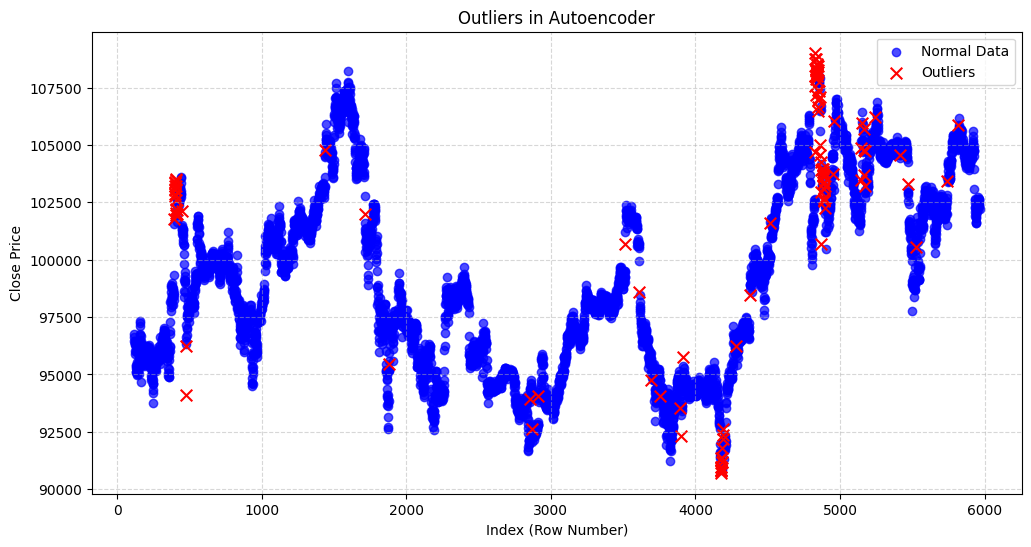

In [ ]:
import keras
from sklearn.preprocessing import MinMaxScaler


def detect_outliers(df: pd.DataFrame) -> np.ndarray:
    """
    Detect outliers using statistical methods and autoencoder.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with features

    Returns:
    --------
    numpy.ndarray: Boolean mask where True indicates an outlier
    """
    # Get feature columns (exclude timestamps and targets)
    feature_cols = [col for col in df.columns if col not in [
        'open_time', 'hour', 'day_of_week', 'is_weekend', 'month',
        'target_binary', 'target_pct_change', 'target_abs_change',
        'target_multiclass', 'target_log_return', 'target_normalized_change'
    ]]

    # Autoencoder-based outlier detection
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[feature_cols])

    autoencoder = Autoencoder(scaled_data.shape[1])

    # Compile model
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder with early stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=Config.EARLY_STOPPING_PATIENCE,
        restore_best_weights=True
    )

    autoencoder.fit(
        scaled_data, scaled_data,
        epochs=Config.EPOCHS,
        batch_size=Config.BATCH_SIZE,
        shuffle=True,
        validation_split=Config.VALIDATION_SPLIT,
        callbacks=[early_stopping],
        verbose=1
    )

    # Compute reconstruction error
    reconstructed = autoencoder.predict(scaled_data)
    reconstruction_error = np.mean(np.abs(scaled_data - reconstructed), axis=1)

    # Define anomaly threshold
    threshold = np.percentile(reconstruction_error, ANOMALY_PERCENTILE)

    # Combine outlier detection methods
    outliers_mask = reconstruction_error > threshold
    print(f"Combined methods identified {outliers_mask.sum()} outliers")

    return outliers_mask


outliers_mask_autoencoder = detect_outliers(df_original)
plot_outliers(df_original, outliers_mask_autoencoder, "Outliers in Autoencoder")

### Isolation forest

Isolation Forest detected 117 outliers.


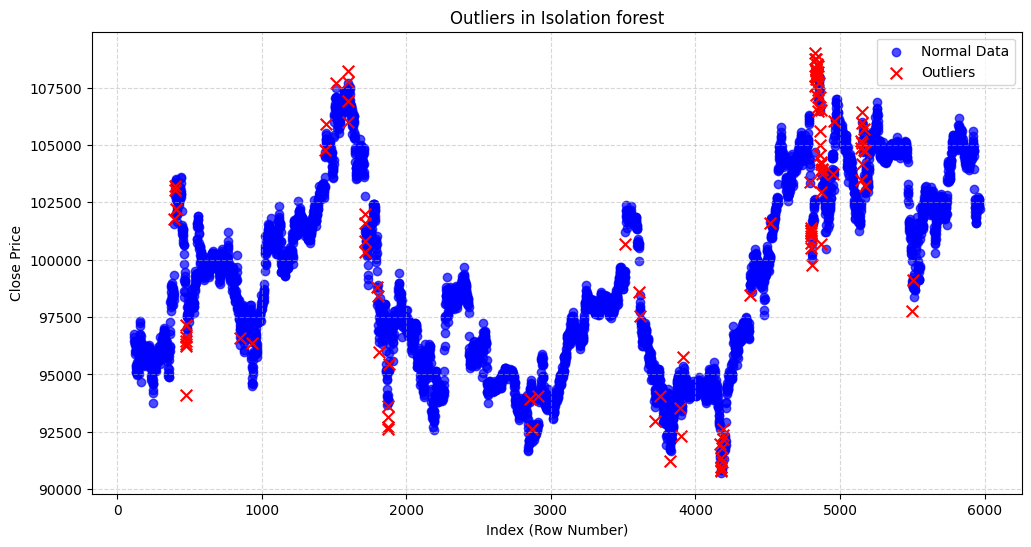

In [ ]:
from sklearn.ensemble import IsolationForest

# Select feature columns (excluding non-numeric fields)
feature_cols = [col for col in df_original.columns if col not in [
    'open_time', 'hour', 'day_of_week', 'is_weekend', 'month',
    'target_binary', 'target_pct_change', 'target_abs_change',
    'target_multiclass', 'target_log_return', 'target_normalized_change'
]]

# Extract numerical data
X = df_original.loc[:, feature_cols]  # Select only the feature columns

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors="coerce").dropna()

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Create an outlier mask
outliers_mask_isolation_forest = outliers == -1

# Count detected anomalies
print(f"Isolation Forest detected {outliers_mask_isolation_forest.sum()} outliers.")

# Plot the detected outliers
plot_outliers(df_original, outliers_mask_isolation_forest, "Outliers in Isolation forest")


### Output data

In [ ]:
dirname = "/content/drive/MyDrive/AI_capstone"
filename = "klines_BTC_unmask.csv"
file_ = f"{dirname}/{filename}"

In [ ]:
total_mask = outliers_mask_autoencoder | outliers_mask_isolation_forest

# Ensure total_mask is a pandas Series with the same index
total_mask = pd.Series(total_mask, index=df_original.index)

# Keep only non-outlier data
non_outlier_df = df_original[~total_mask]

# Save to CSV
non_outlier_df.to_csv(file_, index=False)
print(f"Filtered data saved to {file_}")


Filtered data saved to /content/drive/MyDrive/AI_capstone/klines_BTC_unmask.csv


# Supervised learning





In [ ]:
df = df_original

# df = pd.read_csv(Config.FILE)

In [ ]:

datas = prepare_train_test_splits(df)

print(f"load data with {Config.FILE}")
print(print("Available columns:", df.columns))

feature_cols = datas['feature_columns']

X_train = datas['X_train']
X_test = datas['X_test']
y_train_dict = datas['y_train']
y_test_dict = datas['y_test']

Training data from 2024-12-02 05:15:00 to 2025-01-19 23:00:00
Testing data from 2025-01-19 23:15:00 to 2025-02-01 03:30:00
load data with /content/drive/MyDrive/AI_capstone/klines_BTC_unmask.csv
Available columns: Index(['open_time', 'open', 'high', 'low', 'close', 'volume',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'return',
       'log_return', 'volatility', 'price_range', 'ma_7', 'ma_25', 'ma_99',
       'atr', 'ema_12', 'ema_26', 'macd', 'macd_signal', 'macd_hist', 'rsi',
       'bb_middle', 'bb_upper', 'bb_lower', 'bb_width', 'bb_pct',
       'volume_change', 'volume_ma_7', 'volume_relative', 'obv', 'hour',
       'day_of_week', 'is_weekend', 'month', 'target_binary',
       'target_pct_change', 'target_abs_change', 'target_multiclass',
       'target_log_return', 'target_normalized_change'],
      dtype='object')
None


## First part: decision tree vs. random forest vs. decision tree



### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def train_decision_tree_regressor(X_train, y_train, X_test, y_test, feature_cols):
    """
    Train a Decision Tree Regressor to predict continuous values.

    Parameters:
    -----------
    X_train, y_train : Training dataset
    X_test, y_test : Testing dataset
    feature_cols : List of feature names

    Returns:
    --------
    Model, Predictions, and Feature Importance DataFrame
    """
    # Train Decision Tree Regressor
    dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    dt_model.fit(X_train, y_train)

    # Predictions
    predictions = dt_model.predict(X_test)

    # Analyze feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': dt_model.feature_importances_
    }).sort_values('importance', ascending=False)

    return dt_model, predictions, feature_importance

# Example Usage:
# dt_regressor, y_pred, feature_importance_df = train_decision_tree_regressor(X_train, y_train, X_test, y_test, feature_cols)


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def train_random_forest_regressor(X_train, y_train, X_test, y_test, feature_cols):
    """
    Train a Random Forest Regressor and analyze feature importance.

    Parameters:
    -----------
    X_train, y_train : Training dataset
    X_test, y_test : Testing dataset
    feature_cols : List of feature names

    Returns:
    --------
    Model, Predictions, and Feature Importance DataFrame
    """
    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    predictions = rf_model.predict(X_test)

    # Analyze feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    return rf_model, predictions, feature_importance

# Example Usage:
# rf_regressor, y_pred, feature_importance_df = train_random_forest_regressor(X_train, y_train, X_test, y_test, feature_cols)


### XGBoost

In [ ]:
from xgboost import XGBRegressor
import pandas as pd

def train_xgboost_regressor(X_train, y_train, X_test, y_test, feature_cols):
    """
    Train an XGBoost Regressor and analyze feature importance.

    Parameters:
    -----------
    X_train, y_train : Training dataset
    X_test, y_test : Testing dataset
    feature_cols : List of feature names

    Returns:
    --------
    Model, Predictions, and Feature Importance DataFrame
    """
    # Train XGBoost Regressor
    xgb_model = XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
    xgb_model.fit(X_train, y_train)

    # Predictions
    predictions = xgb_model.predict(X_test)

    # Analyze feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)

    return xgb_model, predictions, feature_importance



### Visualize

In [ ]:
import matplotlib.pyplot as plt


def plot_feature_importance(dt_importance, rf_importance, xgb_importance):
    """
    Plot feature importance for Decision Tree, Random Forest, and XGBoost.

    Parameters:
    -----------
    dt_importance : Feature importance from Decision Tree
    rf_importance : Feature importance from Random Forest
    xgb_importance : Feature importance from XGBoost
    """
    plt.figure(figsize=(15, 5))

    # Decision Tree
    plt.subplot(1, 3, 1)
    plt.barh(dt_importance['feature'][:10], dt_importance['importance'][:10])
    plt.gca().invert_yaxis()
    plt.title("Decision Tree Feature Importance")

    # Random Forest
    plt.subplot(1, 3, 2)
    plt.barh(rf_importance['feature'][:10], rf_importance['importance'][:10])
    plt.gca().invert_yaxis()
    plt.title("Random Forest Feature Importance")

    # XGBoost
    plt.subplot(1, 3, 3)
    plt.barh(xgb_importance['feature'][:10], xgb_importance['importance'][:10])
    plt.gca().invert_yaxis()
    plt.title("XGBoost Feature Importance")

    plt.tight_layout()
    plt.show()


### Train

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


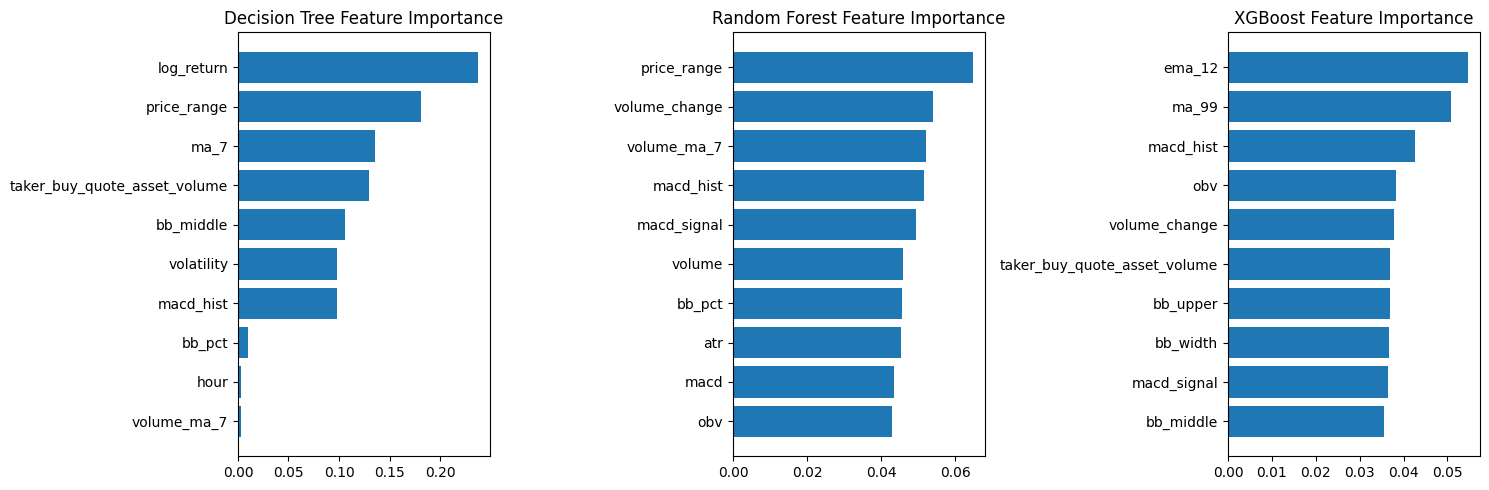

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract only the multiclass labels for classification
y_train = y_train_dict['target_pct_change']
y_test = y_test_dict['target_pct_change']

# Train Models
dt_model, dt_preds, dt_importance = train_decision_tree_regressor(X_train, y_train, X_test, y_test, feature_cols)

rf_model, rf_preds, rf_importance = train_random_forest_regressor(X_train, y_train, X_test, y_test, feature_cols)

xgb_model, xgb_preds, xgb_importance = train_xgboost_regressor(X_train, y_train, X_test, y_test, feature_cols)


# Compare Feature Importance
plot_feature_importance(dt_importance, rf_importance, xgb_importance)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute MAE
dt_mae = mean_absolute_error(y_test, dt_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

# Compute MSE
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

# Compute RMSE
dt_rmse = dt_mse ** 0.5
rf_rmse = rf_mse ** 0.5
xgb_rmse = xgb_mse ** 0.5

# Compute R² Score
dt_r2 = r2_score(y_test, dt_preds)
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Print results
print(f"Decision Tree: MAE={dt_mae:.4f}, RMSE={dt_rmse:.4f}, R²={dt_r2:.4f}")
print(f"Random Forest: MAE={rf_mae:.4f}, RMSE={rf_rmse:.4f}, R²={rf_r2:.4f}")
print(f"XGBoost: MAE={xgb_mae:.4f}, RMSE={xgb_rmse:.4f}, R²={xgb_r2:.4f}")


Decision Tree: MAE=0.0317, RMSE=0.0537, R²=-0.1793
Random Forest: MAE=0.0324, RMSE=0.0531, R²=-0.1502
XGBoost: MAE=0.0397, RMSE=0.0618, R²=-0.5588


## Second part: LSTM vs. Transformer

In [ ]:
import numpy as np

# Load preprocessed data splits
datas = prepare_train_test_splits(df)

X_train, X_test = datas['X_train'], datas['X_test']
y_train, y_test = datas['y_train']['target_pct_change'], datas['y_test']['target_pct_change']

# Reshape data for LSTM & Transformer: (samples, time_steps, features)
time_steps = 120  # Number of previous time steps used for prediction

def reshape_to_sequences(X, y, time_steps):
    """
    Reshape data into sequences for time series forecasting.

    Parameters:
    -----------
    X : np.array
        Feature data
    y : np.array
        Target variable
    time_steps : int
        Number of past time steps to use as input

    Returns:
    --------
    X_seq, y_seq : np.array
        Reshaped feature and target arrays
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = reshape_to_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = reshape_to_sequences(X_test, y_test, time_steps)

print(f"Reshaped X_train: {X_train_seq.shape}, Reshaped X_test: {X_test_seq.shape}")


Training data from 2024-12-02 05:15:00 to 2025-01-19 23:00:00
Testing data from 2025-01-19 23:15:00 to 2025-02-01 03:30:00
Reshaped X_train: (4560, 120, 34), Reshaped X_test: (1050, 120, 34)


### LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



def build_lstm_model(input_shape):
    """
    Build and compile an LSTM model for time series forecasting.

    Parameters:
    -----------
    input_shape : tuple
        The shape of the input data (time_steps, features).

    Returns:
    --------
    model : keras.Model
        Compiled LSTM model.
    """
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1)  # Predict next time step
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# ✅ Ensure input shape is correctly passed
lstm_model = build_lstm_model((X_train.shape[0], X_train.shape[1]))
steps = 100

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=5,           # Wait 5 epochs for improvement
    min_delta=0.0001,     # Minimum change to qualify as improvement
    mode='min',           # Stop when val_loss is minimized
    restore_best_weights=True  # Restore best weights when stopping
)

# Model Checkpointing
checkpoint_callback = ModelCheckpoint(
    filepath="best_lstm_model.h5",
    monitor="val_loss",
    save_best_only=True,  # Save only the best model
    mode="min",
    verbose=1
)

# Train LSTM with Early Stopping and Checkpointing
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=steps,
    batch_size=32,
    validation_split=0.1,
    callbacks=[checkpoint_callback, early_stopping]  # Use both Early Stopping & Checkpoint
)

# Predict with LSTM
lstm_preds = lstm_model.predict(X_test_seq)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0233
Epoch 1: val_loss improved from inf to 0.00168, saving model to best_lstm_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0232 - val_loss: 0.0017
Epoch 2/100
127/129 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoch 2: val_loss improved from 0.00168 to 0.00168, saving model to best_lstm_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 3/100
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 3: val_loss improved from 0.00168 to 0.00164, saving model to best_lstm_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 4: val_loss did not improve from 0.00164
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/100
126/129 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019
Epoch 5: val_loss did not improve from 0.00164
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 6/100
125/129 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 6: val_loss did not improve from 0.00164
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - val_loss: 0.0019
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


### Transformer

In [ ]:
import torch
import multiprocessing
from torch.utils.data import TensorDataset, DataLoader

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True  # Optimize GPU training

# Convert NumPy arrays to PyTorch tensors FIRST
X_train_torch = torch.from_numpy(X_train_seq).float()
y_train_torch = torch.from_numpy(y_train_seq).float().unsqueeze(-1)

X_test_torch = torch.from_numpy(X_test_seq).float()
y_test_torch = torch.from_numpy(y_test_seq).float().unsqueeze(-1)

# Use pin_memory() AFTER converting to tensor
X_train_torch = X_train_torch.pin_memory()
y_train_torch = y_train_torch.pin_memory()
X_test_torch = X_test_torch.pin_memory()
y_test_torch = y_test_torch.pin_memory()

# Move data to GPU only during training
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Dynamically set num_workers for best performance
num_workers = min(4, multiprocessing.cpu_count() - 1)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=num_workers, pin_memory=True)


In [ ]:
@torch.no_grad()
def evaluate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        total_loss += loss.item()
    model.train()  # Set model back to training mode
    return total_loss / len(val_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class TransformerTimeSeries(nn.Module):
    """
    Improved Transformer model for time series forecasting.
    """
    def __init__(self, input_dim, embed_dim=128, num_heads=8, ff_dim=256, num_layers=6, dropout=0.1):  # Dropout fixed
        super().__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.positional_encoding = self.get_sinusoidal_encoding(512, embed_dim)  # Fixed Positional Encoding
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim, dropout=dropout)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, 1)

    def forward(self, x):
        x = self.embedding(x) + self.positional_encoding[:x.shape[1], :].unsqueeze(0).to(x.device)
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, embed_dim)
        x = self.encoder(x)
        x = x.permute(1, 0, 2)  # Convert back
        return self.fc(x[:, -1, :])  # Predict next time step

    def get_sinusoidal_encoding(self, seq_len, d_model):
        position = torch.arange(seq_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros(seq_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe


In [ ]:

# Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32  # Increase batch size
lr = 0.0005  # Reduce learning rate
dropout = 0.1  # Fix dropout
transformer_model = TransformerTimeSeries(input_dim=X_train_seq.shape[2], dropout=dropout).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=lr)
scaler = torch.cuda.amp.GradScaler()

best_val_loss = float("inf")
patience = 10
patience_counter = 0
steps = 100

for epoch in range(steps):
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # ✅ Move batches to GPU

        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda"):  # ✅ Updated for new PyTorch version
            outputs = transformer_model(X_batch)
            loss = criterion(outputs, y_batch)

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), max_norm=1.0)  # Gradient Clipping
        scaler.step(optimizer)
        scaler.update()


    val_loss = evaluate_model(transformer_model, test_loader, criterion)

    print(f"Epoch {epoch}: Train Loss {loss.item():.4f}, Val Loss {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(transformer_model.state_dict(), "transformer_best.pth")
        print(f"Model saved at epoch {epoch} (New Best Val Loss: {val_loss:.4f})")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
<ipython-input-27-46176d650b04>:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16, 1, 1])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Train Loss 0.0020, Val Loss 0.0031
Model saved at epoch 0 (New Best Val Loss: 0.0031)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Train Loss 0.0011, Val Loss 0.0017
Model saved at epoch 1 (New Best Val Loss: 0.0017)
Epoch 2: Train Loss 0.0016, Val Loss 0.0027
Epoch 3: Train Loss 0.0017, Val Loss 0.0035
Epoch 4: Train Loss 0.0010, Val Loss 0.0016
Model saved at epoch 4 (New Best Val Loss: 0.0016)
Epoch 5: Train Loss 0.0014, Val Loss 0.0019
Epoch 6: Train Loss 0.0300, Val Loss 0.0017
Epoch 7: Train Loss 0.0006, Val Loss 0.0019
Epoch 8: Train Loss 0.0047, Val Loss 0.0017
Epoch 9: Train Loss 0.0004, Val Loss 0.0017
Epoch 10: Train Loss 0.0015, Val Loss 0.0016
Model saved at epoch 10 (New Best Val Loss: 0.0016)
Epoch 11: Train Loss 0.0010, Val Loss 0.0017
Epoch 12: Train Loss 0.0004, Val Loss 0.0017
Epoch 13: Train Loss 0.0019, Val Loss 0.0018
Epoch 14: Train Loss 0.0016, Val Loss 0.0017
Epoch 15: Train Loss 0.0006, Val Loss 0.0016
Epoch 16: Train Loss 0.0022, Val Loss 0.0018
Epoch 17: Train Loss 0.0044, Val Loss 0.0021
Epoch 18: Train Loss 0.0026, Val Loss 0.0026
Epoch 19: Train Loss 0.0008, Val Loss 0.0022


In [ ]:
# Move model to GPU
transformer_model.to(device)

# Move data to GPU (before passing it to the model)
with torch.no_grad():
    transformer_preds = transformer_model(X_test_torch.to(device))  # ✅ Move data to the same device
    transformer_preds = transformer_preds.cpu().numpy()  # ✅ Move back to CPU if needed for further processing


### Evaluate


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute errors
lstm_mae = mean_absolute_error(y_test_seq, lstm_preds)
lstm_mse = mean_squared_error(y_test_seq, lstm_preds)

transformer_mae = mean_absolute_error(y_test_seq, transformer_preds)
transformer_mse = mean_squared_error(y_test_seq, transformer_preds)

print(f"LSTM MAE: {lstm_mae:.4f}, MSE: {lstm_mse:.4f}")
print(f"Transformer MAE: {transformer_mae:.4f}, MSE: {transformer_mse:.4f}")


LSTM MAE: 0.0279, MSE: 0.0017
Transformer MAE: 0.0296, MSE: 0.0018


### Plot

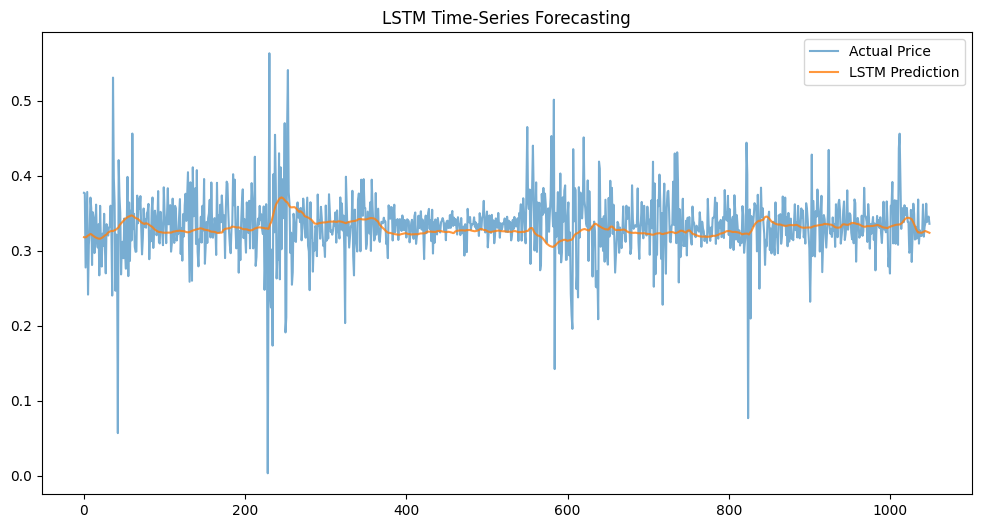

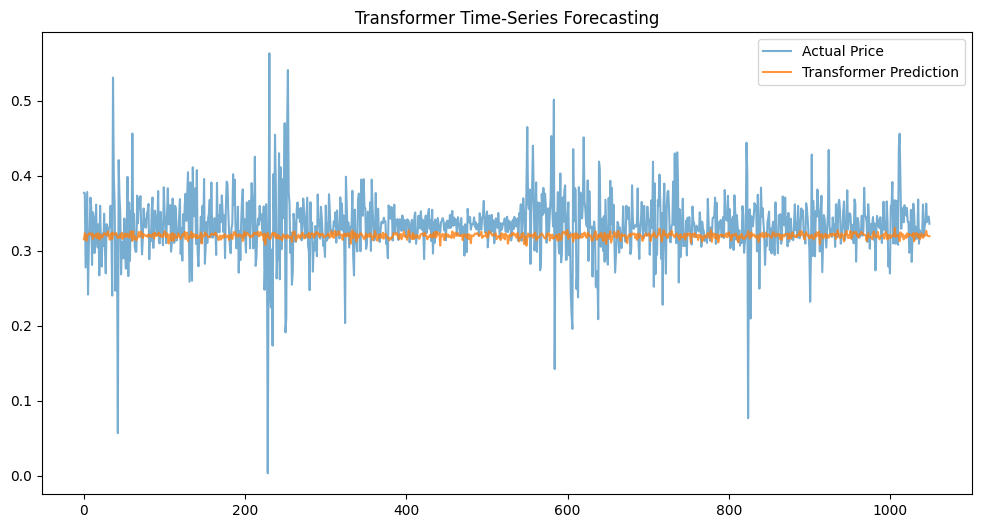

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot LSTM predictions
plt.plot(y_test_seq, label="Actual Price", alpha=0.6)
plt.plot(lstm_preds, label="LSTM Prediction", alpha=0.8)
plt.title("LSTM Time-Series Forecasting")
plt.legend()
plt.show()

# Plot Transformer predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Actual Price", alpha=0.6)
plt.plot(transformer_preds, label="Transformer Prediction", alpha=0.8)
plt.title("Transformer Time-Series Forecasting")
plt.legend()
plt.show()


In [ ]:
!cp /content/best_lstm_model.h5 /content/drive/MyDrive/AI_capstone
!cp /content/transformer_best.pth /content/drive/MyDrive/AI_capstone

# Unsupervised learning

## density estimation : GMM vs.HMM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM

In [ ]:
# Load the cleaned dataset
df = pd.read_csv(Config.FILE)

# Prepare train/test splits
datas = prepare_train_test_splits(df)

# Extract transformed feature matrix
X_train, X_test = datas['X_train'], datas['X_test']
y_train, y_test = datas['y_train']['target_pct_change'], datas['y_test']['target_pct_change']


Training data from 2024-12-02 05:15:00 to 2025-01-19 09:00:00
Testing data from 2025-01-19 09:15:00 to 2025-02-01 03:30:00


### Gaussian mixture model (GMM)

In [ ]:
# ✅ Fit GMM on training data
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
gmm.fit(X_train)

# ✅ Predict clusters for both training and test sets
train_clusters = gmm.predict(X_train)
test_clusters = gmm.predict(X_test)

# ✅ Assign clusters to DataFrame
df.loc[datas['train_dates'].index, "GMM_Cluster"] = train_clusters
df.loc[datas['test_dates'].index, "GMM_Cluster"] = test_clusters


### Hidden Markov model (HMM)

In [ ]:
from hmmlearn.hmm import GaussianHMM

# ✅ Train HMM with 3 hidden states (e.g., bull, bear, neutral)
hmm = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, random_state=42)
hmm.fit(X_train)

# ✅ Predict hidden states for train & test data
train_states = hmm.predict(X_train)
test_states = hmm.predict(X_test)

# ✅ Store hidden states in DataFrame
df.loc[datas['train_dates'].index, "HMM_State"] = train_states
df.loc[datas['test_dates'].index, "HMM_State"] = test_states


### Plot

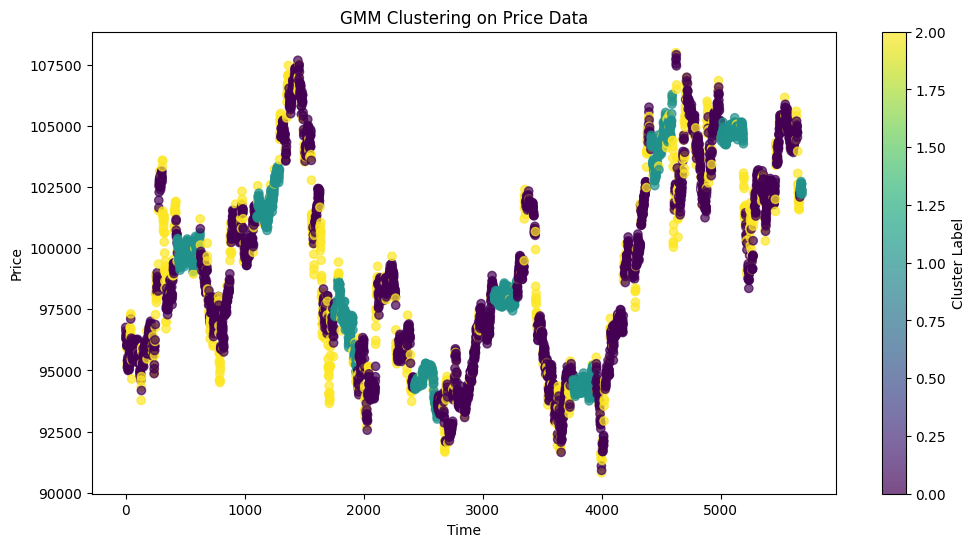

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df["close"], c=df["GMM_Cluster"], cmap="viridis", alpha=0.7)
plt.title("GMM Clustering on Price Data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
# Plot market regimes over price data
plt.figure(figsize=(15, 6))
plt.scatter(df["open_time"], df["close"], c=df["HMM_State"], cmap="coolwarm", label="Market States")
plt.colorbar(label="Market Regime (HMM States)")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("HMM-Inferred Market Regimes with Technical Indicators")
plt.show()

### Compare

In [ ]:
import pandas as pd

# Select only numeric columns (excluding datetime & categorical data)
numeric_cols = df.select_dtypes(include=["number"]).columns

# Group by GMM clusters and compute average values
gmm_cluster_averages = df.groupby("GMM_Cluster")[numeric_cols].mean()
print("\n🔹 GMM Cluster Averages:")
print(gmm_cluster_averages)

# Group by HMM states and compute average values
hmm_cluster_averages = df.groupby("HMM_State")[numeric_cols].mean()
print("\n🔹 HMM Market Regime Averages:")
print(hmm_cluster_averages)



🔹 GMM Cluster Averages:
                      open           high            low          close  \
GMM_Cluster                                                               
0.0           98387.643527   98587.247924   98174.250611   98384.398241   
1.0           97395.565282   97548.601773   97243.925805   97399.610919   
2.0          102600.162901  102778.083623  102425.880214  102602.971925   

                  volume  taker_buy_base_asset_volume  \
GMM_Cluster                                             
0.0          2501.645401                  1234.612422   
1.0          1467.579778                   722.062342   
2.0          1935.190762                   969.499777   

             taker_buy_quote_asset_volume    return  log_return  volatility  \
GMM_Cluster                                                                   
0.0                          1.214986e+08 -0.000030   -0.000034    0.002979   
1.0                          7.015770e+07  0.000044    0.000042    0.002157 